# **# Dicoding : Richard Angelico Pudjohartono**

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('drive/MyDrive/content/rockpaperscissors.zip', 'r') as zipObj:
  zipObj.extractall('/content/')  

Siapkan File Data Batu Gunting Kertas : 

In [ ]:
import zipfile
import os

In [ ]:
folder_gunting = os.path.join('/content/rockpaperscissors/scissors')
folder_batu = os.path.join('/content/rockpaperscissors/rock')
folder_kertas = os.path.join('/content/rockpaperscissors/paper')

print('Jumlah gambar gunting : ', len(os.listdir(folder_gunting)))
print('Jumlah gambar batu    : ', len(os.listdir(folder_gunting)))
print('Jumlah gambar kertas  : ', len(os.listdir(folder_gunting)))

Jumlah gambar gunting :  750
Jumlah gambar batu    :  750
Jumlah gambar kertas  :  750


import modul yang digunakan : 

In [ ]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

Proses augmentasi, pemisahan data training dan validation : 

In [ ]:
basis_dir = 'drive/MyDrive/content/rockpaperscissors/rps-cv-images'
training_datagen = ImageDataGenerator(
                    rescale=1./255,
#Augmentasi
                    rotation_range=40,
		                width_shift_range=0.2,
		                height_shift_range=0.2,
                    shear_range = 0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode = 'nearest',
#Training + Validasi
                    validation_split=0.4)

In [ ]:
os.listdir(basis_dir)

['README_rpc-cv-images.txt', 'paper', 'rock', 'scissors']

Pembedaan data berdasarkan folder : 

In [ ]:
train_generator = training_datagen.flow_from_directory(
        basis_dir,  
        target_size=(150, 150), 
        #class_mode='categorical',
	      shuffle = True, 
	      subset = 'training'
	)

 
validation_generator = training_datagen.flow_from_directory(
        basis_dir,  
        target_size=(150, 150), 
        class_mode='categorical',
	      shuffle = True, 
	      subset = 'validation'
	)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Membangun model sequential : 

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'),

    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()
Model: "sequential_2"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

Kompilasi Model : 

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Melatih Model Jaringan Saraf Tiruan : 

In [67]:
history=model.fit(
    train_generator,
    steps_per_epoch=4,
    epochs=76,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=2
    )

Epoch 1/76
4/4 - 3s - loss: 0.0480 - accuracy: 0.9898 - val_loss: 0.2509 - val_accuracy: 0.9453 - 3s/epoch - 630ms/step
Epoch 2/76
4/4 - 2s - loss: 0.0242 - accuracy: 1.0000 - val_loss: 0.2212 - val_accuracy: 0.9297 - 2s/epoch - 614ms/step
Epoch 3/76
4/4 - 2s - loss: 0.0118 - accuracy: 0.9922 - val_loss: 0.0118 - val_accuracy: 1.0000 - 2s/epoch - 619ms/step
Epoch 4/76
4/4 - 2s - loss: 0.0353 - accuracy: 0.9922 - val_loss: 0.2832 - val_accuracy: 0.9531 - 2s/epoch - 619ms/step
Epoch 5/76
4/4 - 2s - loss: 1.4532 - accuracy: 0.7344 - val_loss: 0.2283 - val_accuracy: 0.9375 - 2s/epoch - 613ms/step
Epoch 6/76
4/4 - 2s - loss: 0.2031 - accuracy: 0.9297 - val_loss: 0.0647 - val_accuracy: 0.9922 - 2s/epoch - 619ms/step
Epoch 7/76
4/4 - 2s - loss: 0.1262 - accuracy: 0.9766 - val_loss: 0.0844 - val_accuracy: 0.9844 - 2s/epoch - 578ms/step
Epoch 8/76
4/4 - 2s - loss: 0.0476 - accuracy: 0.9922 - val_loss: 0.0701 - val_accuracy: 0.9688 - 2s/epoch - 622ms/step
Epoch 9/76
4/4 - 2s - loss: 0.1106 - acc

# **Check Akurasi**

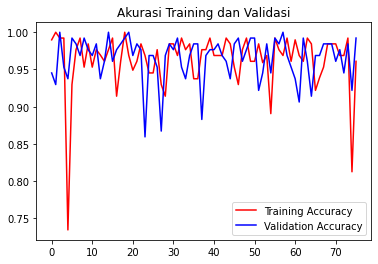

<Figure size 432x288 with 0 Axes>

In [68]:
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

# **Uji Coba Model Menggunakan Gambar Tangan**

Saving WIN_20220902_14_41_21_Pro.jpg to WIN_20220902_14_41_21_Pro (2).jpg
WIN_20220902_14_41_21_Pro.jpg
ini kertas


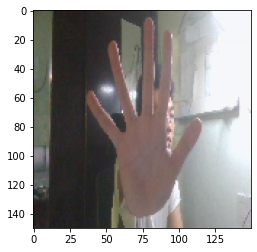

In [74]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][1]==1:
    print('ini batu')
  elif classes[0][2]==1:
    print('ini gunting')
  elif classes[0][0]==1:
    print('ini kertas')
  else:
    print('tidak dikenali')